# Visualization

Trong bài tập này, bạn sẽ được rèn luyện kĩ năng trực quan hóa. Trực quan hóa ngoài việc hỗ  trợ trong khâu tiền xử lí dữ liệu, còn giúp bạn phân tích và rút ra được các thông tin có ý nghĩa từ dữ liệu

**Tập dữ liệu** được sử dụng được lấy từ trang batdongsan.com.vn

In [1]:
#Import các thư viện cần thiết

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math

In [2]:
#Load dữ liệu từ file
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype = {"month": "string" , "id" : "string"})
print("DONE")

DONE


In [3]:
newdf.columns

Index(['id', 'month', 'project', 'investor', 'square', 'bedrooms', 'bathrooms',
       'direction', 'balcony', 'district', 'ward', 'price'],
      dtype='object')

In [4]:
# Xem 5 hàng dữ liệu đầu tiên, các thông tin ban đầu: df.info(), df.describe(), ...
# Code ở đây:
newdf.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


In [5]:
newdf.info()
newdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  string 
 1   month      81162 non-null  string 
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 7.4+ MB


,square,bedrooms,bathrooms,price
count,81162.000000,81162.000000,81162.000000,81162.000000
mean,83.481974,2.365602,1.897785,2404.748090
std,25.662160,0.622283,0.404293,1038.825418
min,7.000000,1.000000,1.000000,350.000000
25%,66.000000,2.000000,2.000000,1520.000000
50%,79.000000,2.000000,2.000000,2300.000000
75%,98.000000,3.000000,2.000000,3150.000000
max,296.000000,4.000000,4.000000,5000.000000


# Đưa ra các câu lệnh để thực hiện các yêu cầu sau:

## Vẽ biểu đồ boxblot của các trường số như price, bedrooms, square, ...

* Gợi ý: sns.boxplot(data_field)

c:\Users\baotg2\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


<Axes: xlabel='price'>

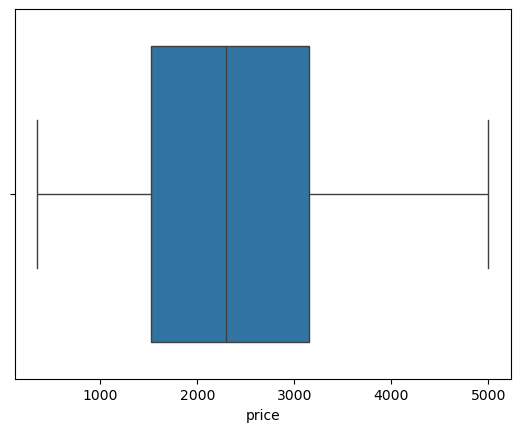

In [6]:
#Code for 'price' field

sns.boxplot(x=newdf['price'])


<Axes: xlabel='square'>

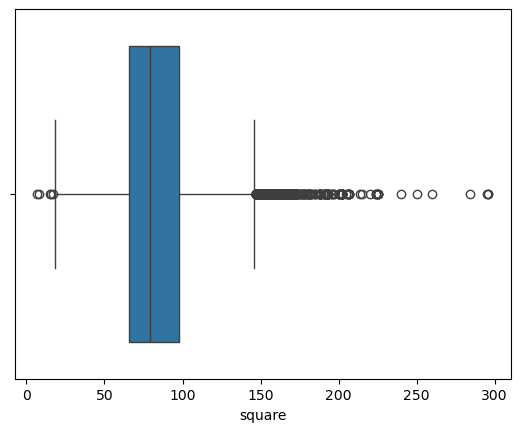

In [7]:
#Code for 'square' field
sns.boxplot(x=newdf['square'])

<Axes: xlabel='bedrooms'>

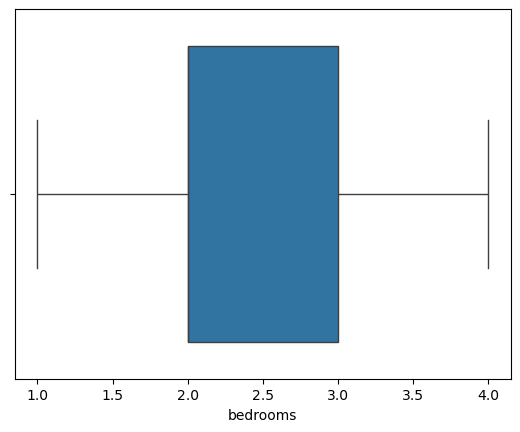

In [8]:
#Code for 'bedrooms' field
sns.boxplot(x=newdf['bedrooms'])

<Axes: xlabel='bathrooms'>

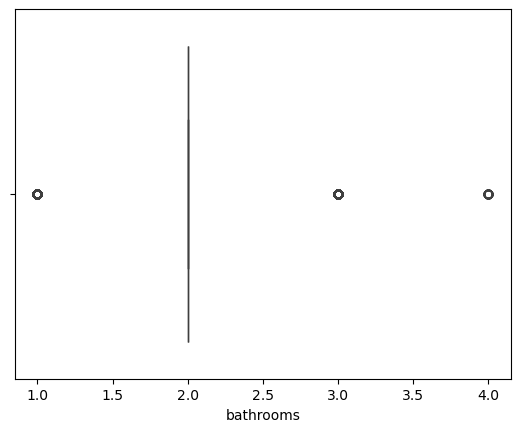

In [9]:
#Code for 'bathrooms' field
sns.boxplot(x=newdf['bathrooms'])

## Vẽ biểu đồ cột, histogram để xem xét xu hướng, quy luật, ...

 Cho đoạn code minh họa Biểu đồ thể hiện số bài đăng theo tháng của năm 2020. Hãy thực hiện các yêu cầu cho các câu hỏi dưới đây:

C:\Users\baotg2\AppData\Local\Temp\ipykernel_8020\1920162332.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')


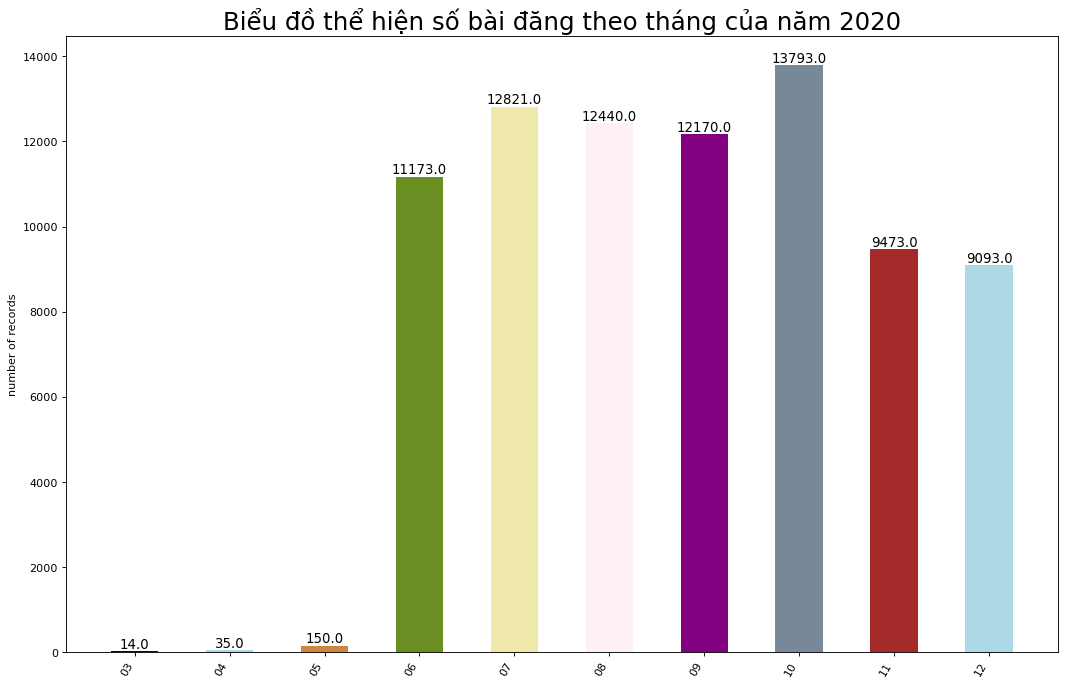

In [10]:
df1 = newdf.groupby('month').size().reset_index(name='number of records')
n = df1['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df1['month'], df1['number of records'], color=c, width=.5)
for i, val in enumerate(df1['number of records'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df1['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số bài đăng theo tháng của năm 2020", fontsize=22)
plt.ylabel('number of records')
plt.show()

* Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)

C:\Users\baotg2\AppData\Local\Temp\ipykernel_8020\2978318017.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df2['month'], rotation=60, horizontalalignment= 'right')


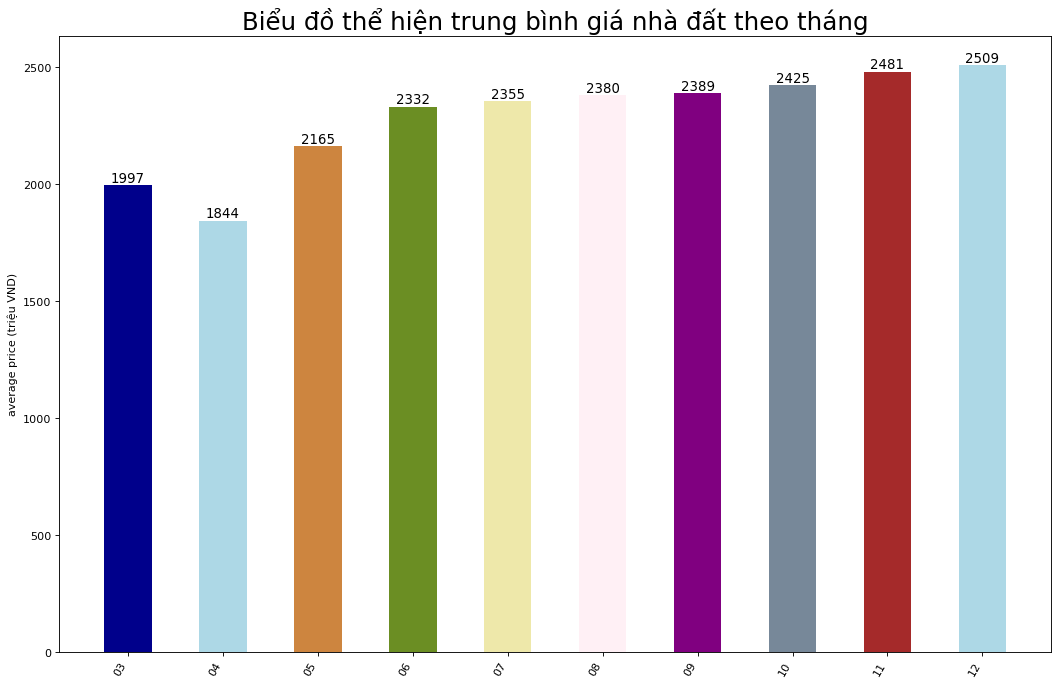

In [11]:
#Code ở đây
#Biểu đồ thể hiện giá nhà đất trung bình theo tháng (VND/m2)
df2 = newdf.groupby('month')['price'].mean().reset_index(name='average price')
n = df2['month'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['month'], df2['average price'], color=c, width=.5)
for i, val in enumerate(df2['average price'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['month'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện trung bình giá nhà đất theo tháng", fontsize=22)
plt.ylabel('average price (triệu VND)')
plt.show()



* Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)

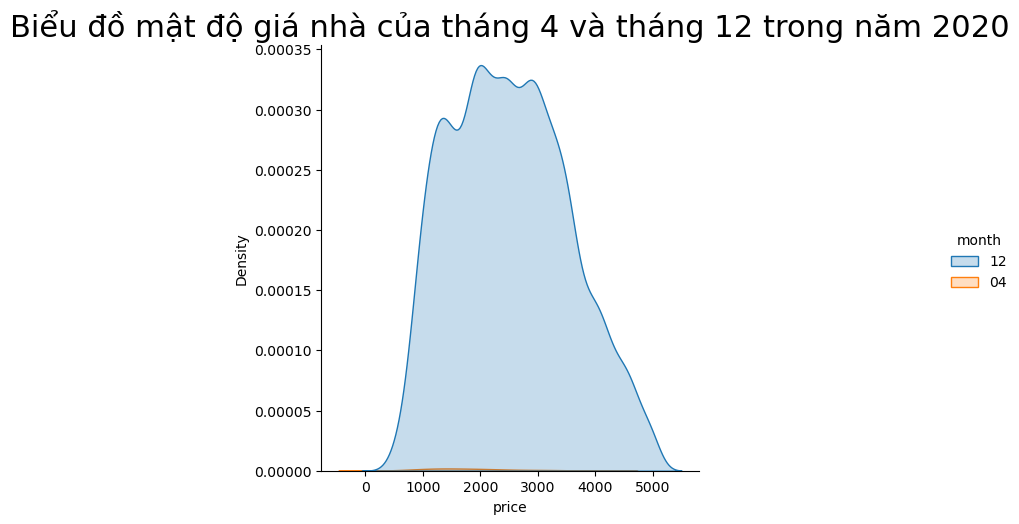

In [45]:
#Gọi ý: sns.displot()
#Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 (VND/m2)
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype={"month": "string", "id": "string"})
newdf2 = newdf[(newdf['month'] == '04')|(newdf['month'] == '12')]

sns.displot(newdf2, x="price", hue="month", kind="kde", fill=True)
plt.title("Biểu đồ mật độ giá nhà của tháng 4 và tháng 12 trong năm 2020", fontsize=22)
plt.ylabel('Density')
plt.show()



* Số lượng bất động sản phân theo số lượng bedrooms

In [46]:
newdf.head()

,id,month,project,investor,square,bedrooms,bathrooms,direction,balcony,district,ward,price
0,28086120,12,Vinhomes Smart City Đại Mỗ,Tập đoàn Vingroup,60.0,3.0,1.0,Đông-Nam,Tây-Bắc,nam tu liem,dai mo,1560.0
1,28088954,12,Goldmark City,Công ty TNHH Thương mại - Quảng cáo - Xây dựng...,121.0,3.0,2.0,NaN,NaN,bac tu liem,phu dien,3300.0
2,28097966,12,Chung cư IEC Tứ Hiệp,NaN,70.0,2.0,2.0,Tây-Bắc,Đông-Nam,thanh tri,tu hiep,1106.0
3,27895887,12,Vinhomes D'Capitale,Tân Hoàng Minh Group,39.0,1.0,1.0,Đông-Nam,Đông-Nam,cau giay,trung hoa,1500.0
4,28056031,12,The Zen Residence,Công ty TNHH Gamuda Land Việt Nam,97.0,3.0,2.0,NaN,NaN,hoang mai,hoang liet,2900.0


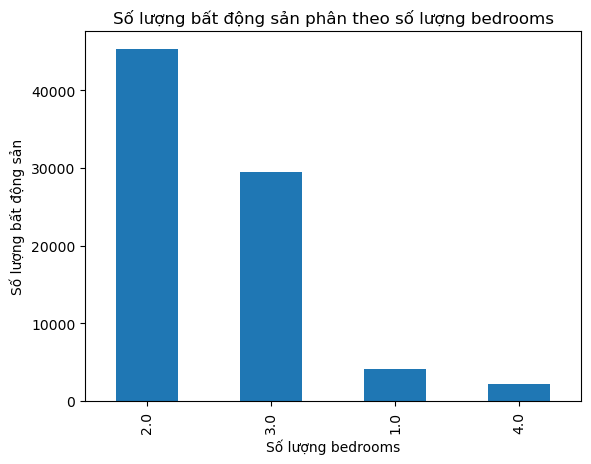

In [57]:
# Số lượng bất động sản phân theo số lượng bedrooms, hiển thị số lượng trên các cột
# Code ở đây

newdf['bedrooms'].value_counts().plot(kind='bar')
plt.title('Số lượng bất động sản phân theo số lượng bedrooms')
plt.xlabel('Số lượng bedrooms')
plt.ylabel('Số lượng bất động sản')
plt.show()


* Giá bất động sản trung bình theo số lượng bedrooms

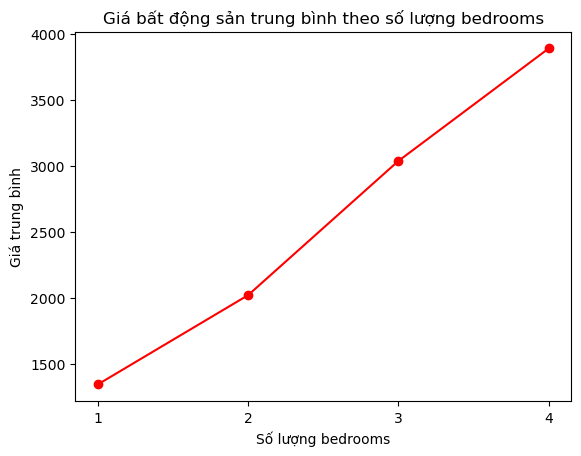

In [69]:
# Giá bất động sản trung bình theo số lượng bedrooms, dùng đồ thị đường

newdf.groupby('bedrooms')['price'].mean().plot(kind='line', marker='o', color='r', xticks=range(1, int(max(newdf['bedrooms'])+1)))   
plt.title('Giá bất động sản trung bình theo số lượng bedrooms')
plt.xlabel('Số lượng bedrooms')
plt.ylabel('Giá trung bình')
plt.show()

* Giá nhà đất trung bình theo quận (VND/m2)

In [70]:
# Code ở đây
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81163 entries, 0 to 81162
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         81163 non-null  string 
 1   month      81162 non-null  string 
 2   project    78097 non-null  object 
 3   investor   65453 non-null  object 
 4   square     81162 non-null  float64
 5   bedrooms   81162 non-null  float64
 6   bathrooms  81162 non-null  float64
 7   direction  51086 non-null  object 
 8   balcony    54426 non-null  object 
 9   district   81162 non-null  object 
 10  ward       79506 non-null  object 
 11  price      81162 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 7.4+ MB


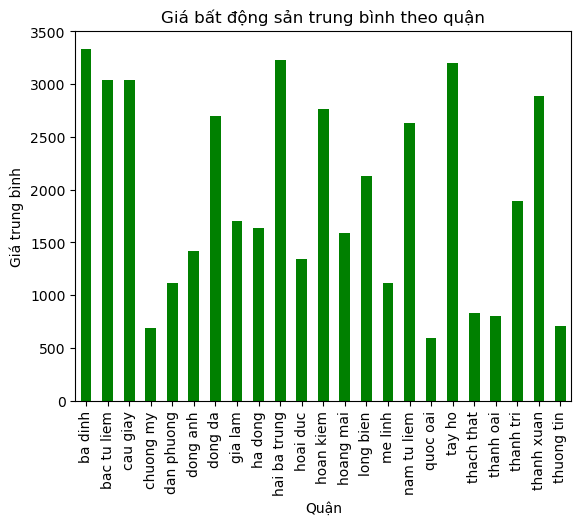

In [71]:
newdf.groupby('district')['price'].mean().plot(kind='bar', color='g')
plt.title('Giá bất động sản trung bình theo quận')
plt.xlabel('Quận')
plt.ylabel('Giá trung bình')
plt.show()

* Giá nhà đất trung bình theo các phường quận Hoàn Kiếm (VND/m2)

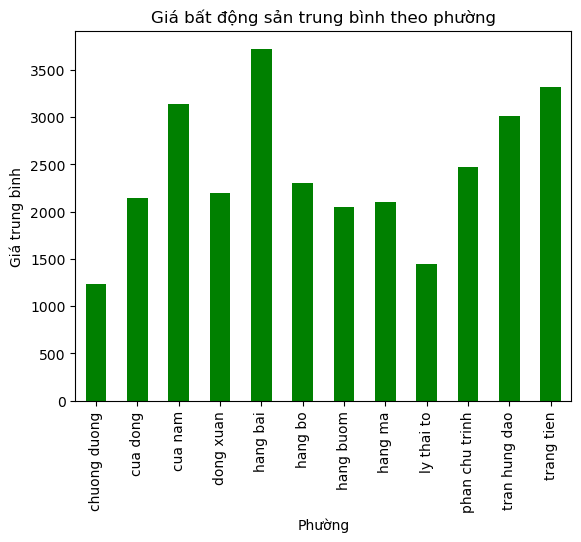

In [73]:
# Code ở đây
newdf = newdf[newdf['district'] == 'hoan kiem']
newdf.groupby('ward')['price'].mean().plot(kind='bar', color='g')
plt.title('Giá bất động sản trung bình theo phường')
plt.xlabel('Phường')
plt.ylabel('Giá trung bình')
plt.show()

* Giá nhà đất trung bình theo nhà đầu tư (VND/m2)

In [78]:
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype={"month": "string", "id": "string"}) 
newdf['investor'].unique().__len__()

263

C:\Users\baotg2\AppData\Local\Temp\ipykernel_8020\2675779110.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df2['investor'], rotation=60, horizontalalignment= 'right')


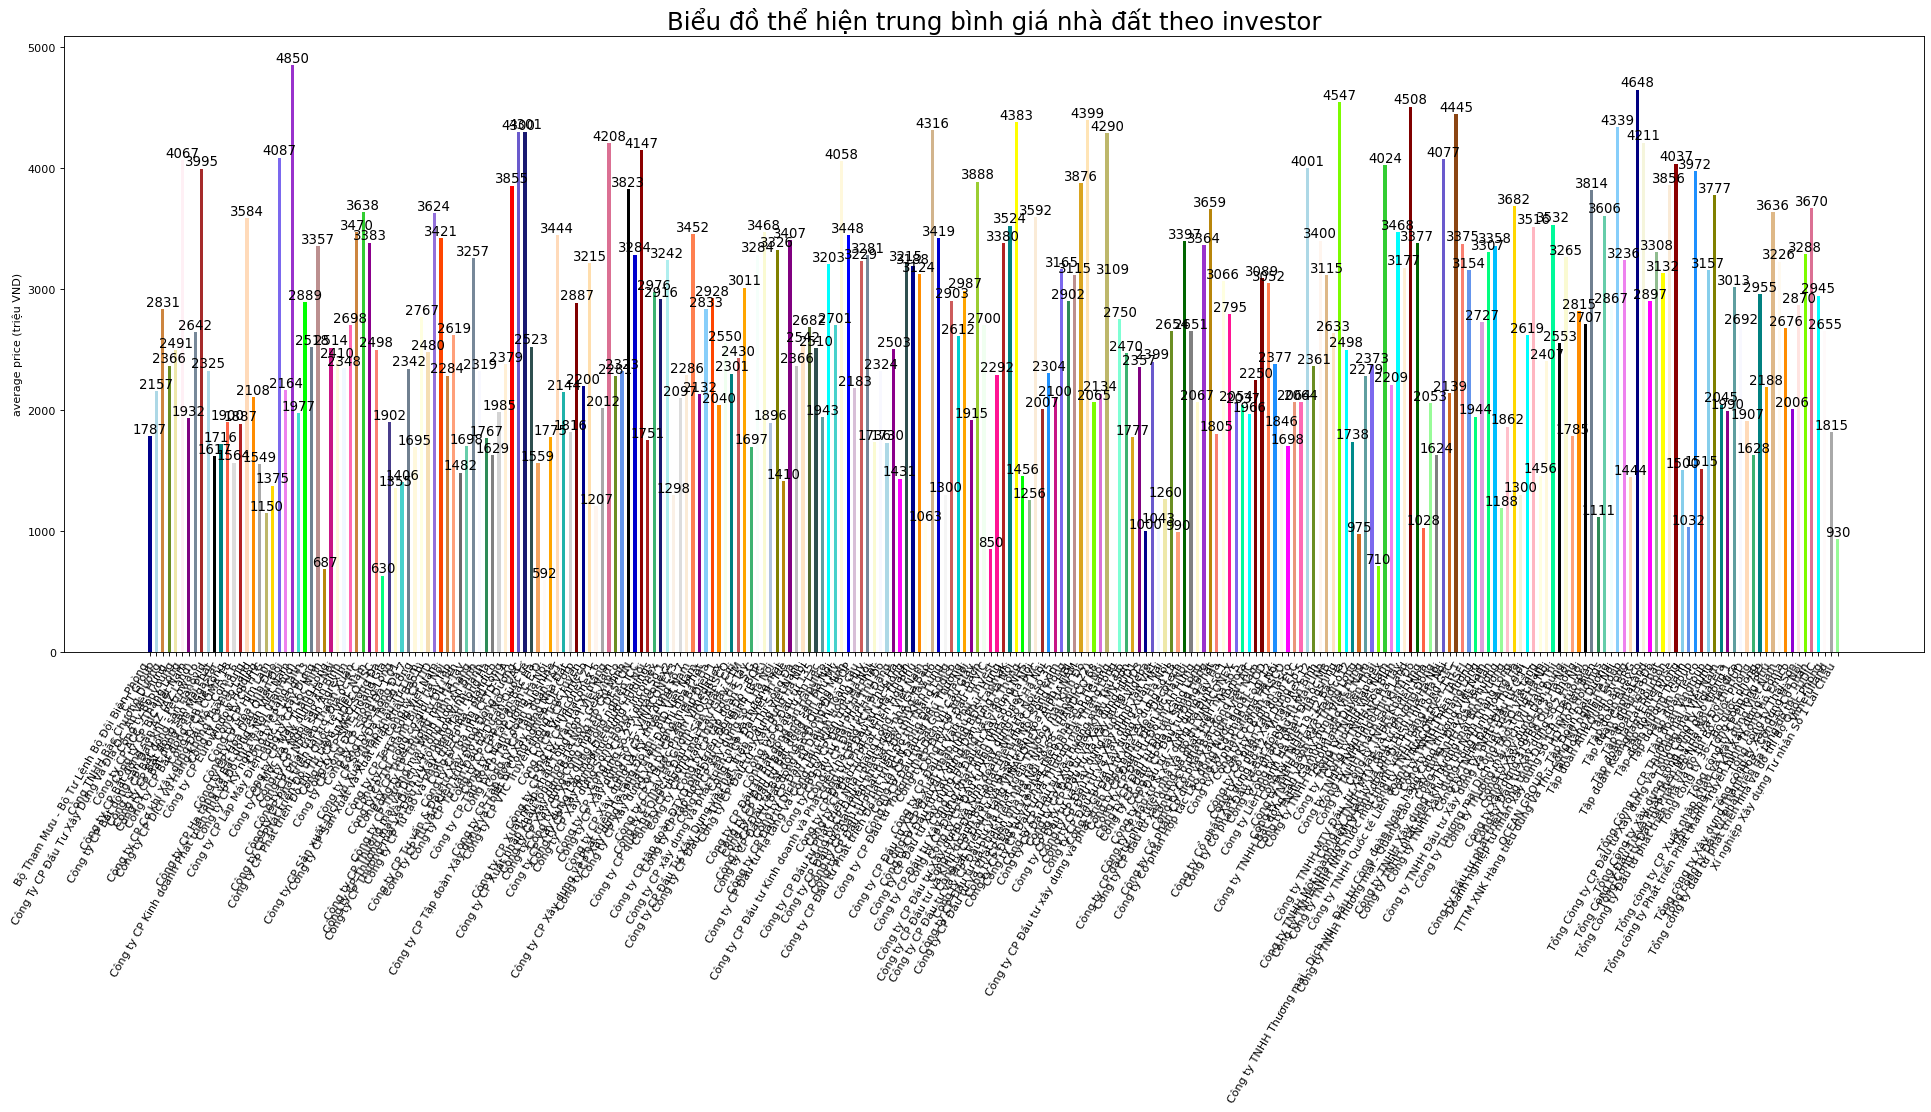

In [81]:

df2 = newdf.groupby('investor')['price'].mean().reset_index(name='average price')
n = df2['investor'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(30,10), dpi= 80)
plt.bar(df2['investor'], df2['average price'], color=c, width=.5)
for i, val in enumerate(df2['average price'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df2['investor'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện trung bình giá nhà đất theo investor", fontsize=22)
plt.ylabel('average price (triệu VND)')
plt.show()


* Giá nhà đất trung bình theo dự án (VND/m2)

In [85]:
newdf['price'].unique().__len__()

3716

* Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2

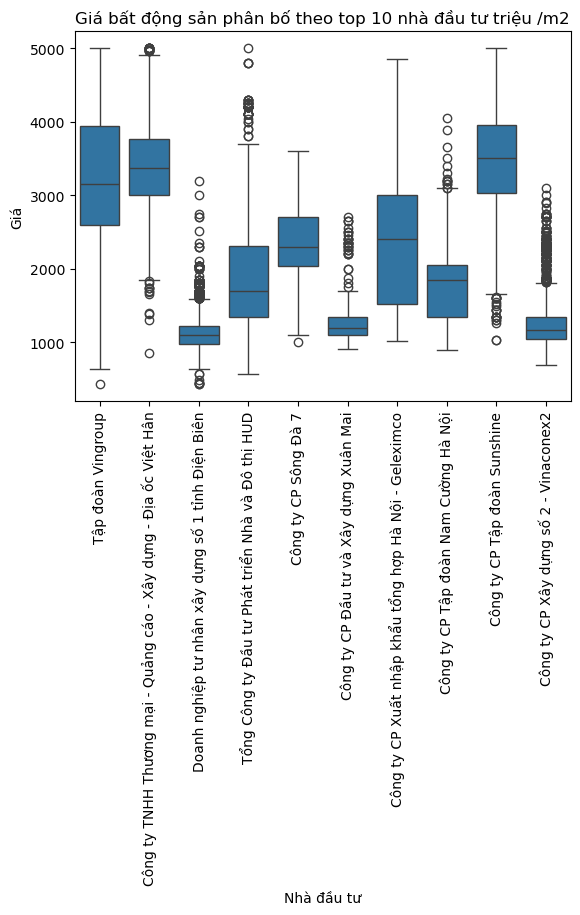

In [88]:
#Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2
newdf = pd.read_csv("batdongsan.com.vn.csv", dtype={"month": "string", "id": "string"})
top10_investor = newdf['investor'].value_counts().head(10).index
newdf = newdf[newdf['investor'].isin(top10_investor)]
sns.boxplot(x='investor', y='price', data=newdf)
plt.title('Giá bất động sản phân bố theo top 10 nhà đầu tư triệu /m2')
plt.xlabel('Nhà đầu tư')
plt.ylabel('Giá')
plt.xticks(rotation=90)
plt.show()


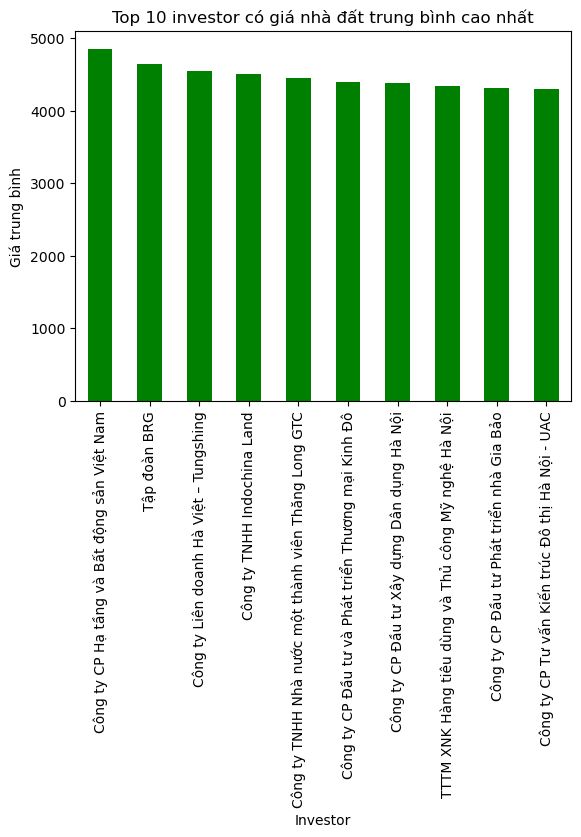

In [86]:
# Code ở đây
top10_investor = newdf.groupby('investor')['price'].mean().nlargest(10)
top10_investor.plot(kind='bar', color='g')
plt.title('Top 10 investor có giá nhà đất trung bình cao nhất')
plt.xlabel('Investor')
plt.ylabel('Giá trung bình')
plt.show()


* Giá bất động sản phân bố theo dự án

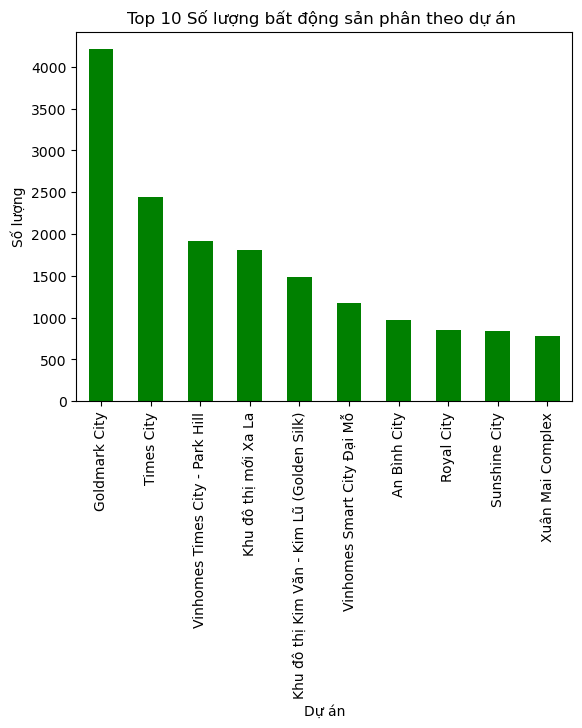

In [91]:
# Code ở đây
project_distribution = newdf['project'].value_counts().head(10)
project_distribution.plot(kind='bar', color='g')
plt.title('Top 10 Số lượng bất động sản phân theo dự án ')
plt.xlabel('Dự án')
plt.ylabel('Số lượng')
plt.show()


* Giá nhà đất trung bình theo hướng nhà (VND/m2)

In [92]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27727 entries, 0 to 81157
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         27727 non-null  string 
 1   month      27727 non-null  string 
 2   project    27727 non-null  object 
 3   investor   27727 non-null  object 
 4   square     27727 non-null  float64
 5   bedrooms   27727 non-null  float64
 6   bathrooms  27727 non-null  float64
 7   direction  19089 non-null  object 
 8   balcony    20304 non-null  object 
 9   district   27727 non-null  object 
 10  ward       27361 non-null  object 
 11  price      27727 non-null  float64
dtypes: float64(4), object(6), string(2)
memory usage: 2.8+ MB


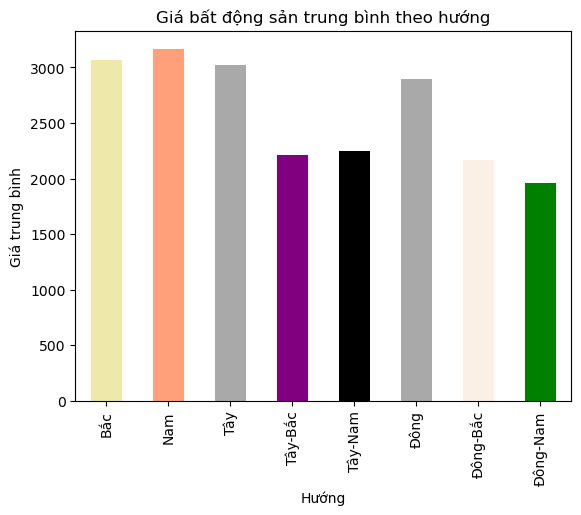

In [95]:
# Code ở đây
direction = newdf.groupby('direction')['price'].mean()
color = random.choices(list(plt.cm.colors.cnames.keys()), k=direction.__len__())
direction.plot(kind='bar', color=color)
plt.title('Giá bất động sản trung bình theo hướng')
plt.xlabel('Hướng')
plt.ylabel('Giá trung bình')
plt.show()


In [22]:
# Code ở đây

## Vẽ biểu đồ tương quan giữa các trường thuộc tính

* https://vi.wikipedia.org/wiki/H%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan
* Tương quan giữa cac cặp biến số thực bằng biểu đồ heatmap

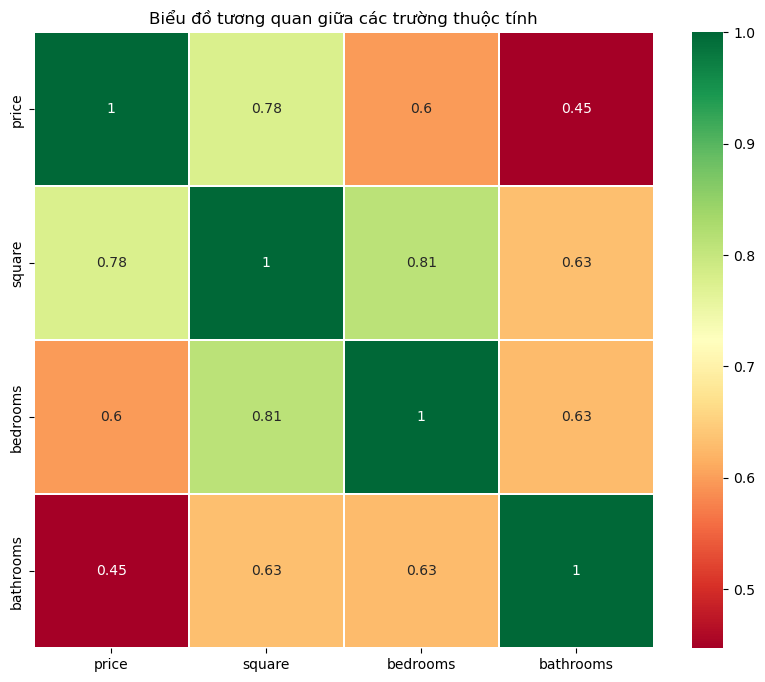

In [98]:
# Gợi ý: sns.heatmap(cmap='RdYlGn', ...)
# Vẽ biểu đồ tương quan giữa các trường thuộc tính
df_heatmap = newdf[['price', 'square', 'bedrooms', 'bathrooms']]
plt.figure(figsize=(10,8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='RdYlGn', linewidths=0.1)
plt.title('Biểu đồ tương quan giữa các trường thuộc tính')
plt.show()



* Tương quan giữa cac cặp biến số thực bằng biểu đồ phân tán

<Figure size 2000x800 with 0 Axes>

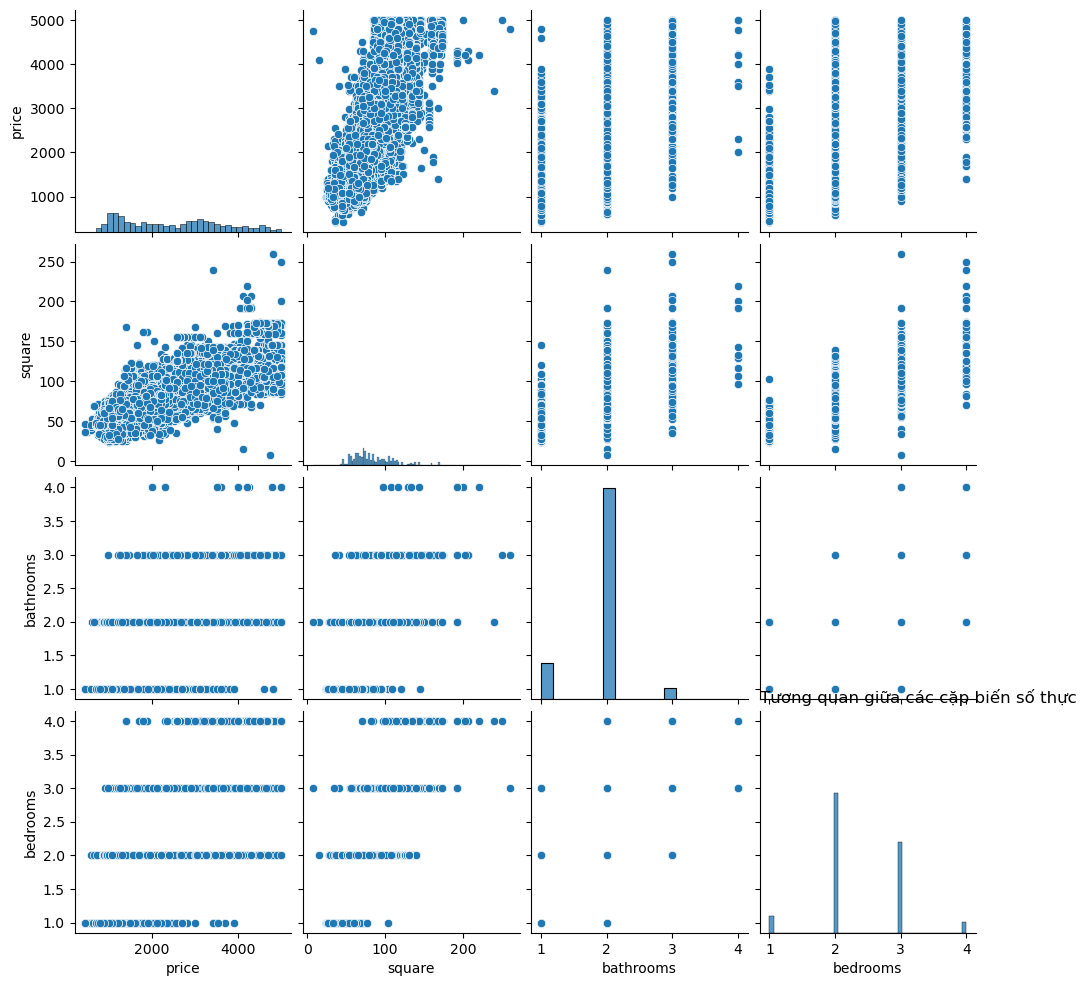

In [103]:
#Gợi ý: sns.pairplot(kind='scatter', ...)
#Tương quan giữa cac cặp biến số thực bằng biểu đồ phân tán
plt.figure(figsize=(20,8))
sns.pairplot(newdf[['price', 'square', 'bathrooms', 'bedrooms']], kind='scatter')
plt.title('Tương quan giữa các cặp biến số thực', loc='left')
plt.show()





End :))